In [4]:
from stats import MetropolisHastings, sphere_sample
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets
from scipy.special import erfinv, erf

# The Maxwell-Boltzmann Distribution

The Maxwell-Boltzmann Distribution for a system of identical non-interacting, non-relativistic particles with temperature $T$ is given by:

$f(v) = \left( \frac{m}{2 \pi k_b T} \right)^{3/2} e^{-\frac{mv^2}{2k_bT}}$

If we want to sample for individual velocity components we can use the 1D Maxwell-Boltzmann Distribution:

$f(v) = \sqrt{\frac{m}{2 \pi k_b T}} e^{-\frac{mv^2}{2k_bT}}$

In [5]:
def maxwell_boltzmann(v,m,kb,t):
	d1 = 2*np.pi*kb*t
	c1 = (m/d1)**(1/2)
	d2 = 2*kb*t
	c2 = -(m*v**2)/d2
	return c1*np.exp(c2)

We want to now sample this distribution with a given mass and temperature. To do so we will use the metropolis-hastings algorithm which is described in the statistics jupyter notebook as well as sampling from the inverse cummulative distribution. For n velocities, we need 3n random numbers. In our example we will be sampling the distribution for Helium at room temp. Use the code cell below to set the constants to be used when sampling.

In [6]:
kb = 1.38e-23 #J/K
m = 6.65e-27 #Kg
t= 300 #K
dx = 1000
num_points = 1000

## The Metropolis-Hastings algorithm

This section explores sampling using the metropolis hastings algorithm, which should converge to the desired distribution with sufficiently large n. The following code cell will produce n random velocities specified above and plot them in 3D.

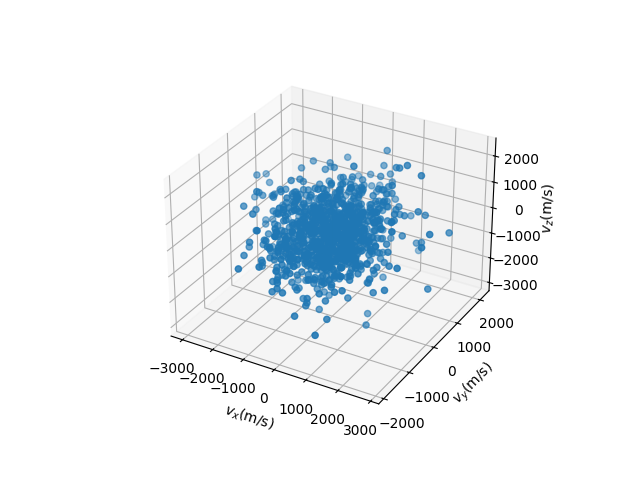

In [7]:
%matplotlib widget


prob_func = lambda v : maxwell_boltzmann(v,m,kb,t)

vx = MetropolisHastings(prob_func,0,dx,num_points)
vy = MetropolisHastings(prob_func,0,dx,num_points)
vz = MetropolisHastings(prob_func,0,dx,num_points)

np.random.shuffle(vx)
np.random.shuffle(vy)
np.random.shuffle(vz)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(f"$v_x$(m/s)")
ax.set_ylabel(f"$v_y$(m/s)")
ax.set_zlabel(f"$v_z$(m/s)")
ax.scatter(vx,vy,vz)
plt.show()
%matplotlib inline

Viewing the projection in a 2D plane gives the following:

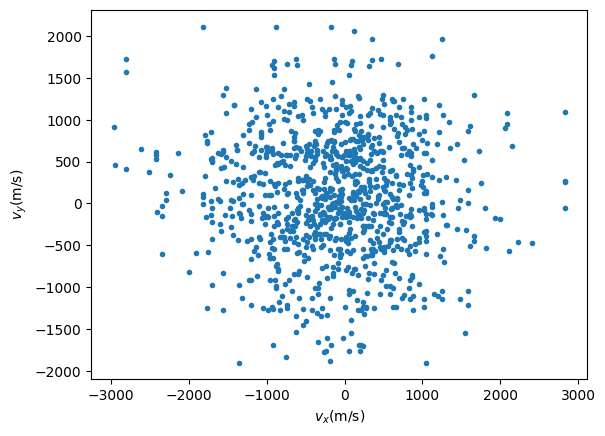

In [8]:
plt.close('all')
plt.plot(vx,vy,".")
plt.xlabel(f"$v_x$(m/s)")
plt.ylabel(f"$v_y$(m/s)")
plt.show()

What we want to do now is compare the magnitudes and check that they follow the speed dstribution which is given as follows:

$f(v) = 4\pi v^2 \left( \frac{m}{2 \pi k_b T} \right)^{3/2} e^{-\frac{mv^2}{2k_bT}}$

In [9]:
def maxwell_boltzmann_speed(v,m,kb,t):
	d1 = 2*np.pi*kb*t
	c1 = (m/d1)**(3/2)
	d2 = 2*kb*t
	c2 = -(m*v**2)/d2
	return 4*np.pi*v**2*c1*np.exp(c2)

In [10]:
out4 = widgets.Output()
b_widget = widgets.BoundedIntText(value=50,min=5,max=100,description="Number of Bins")
sample_button = widgets.Button(description = "Re-Bin")

speed_func = lambda v : maxwell_boltzmann_speed(v,m,kb,t)

def sample_distribution(*args):
	with out4:
		out4.clear_output(wait=True)
		plt.close('all')
		speeds = np.sqrt(vx**2 + vy**2 + vz**2)
		x_vals = np.linspace(0,4000,100)
		y_vals = speed_func(x_vals)
		plt.hist(speeds,bins = b_widget.value,density=True,label="Sampled Distribution")
		plt.plot(x_vals,y_vals,label="Exact Distribution")
		plt.ylabel("Probability Density")
		plt.xlabel("Speed (m/s)")
		plt.legend()
		plt.show()


sample_button.on_click(sample_distribution)

sample_distribution()

controls2 = widgets.VBox([b_widget,sample_button])
view2 = widgets.HBox([controls2,out4])


display(view2)

## The inverse CDF of the 1D distribution
We can also try sampling using the inverse CDF of the 1D Maxwell Boltzmann Distribution given below:

$ \sqrt{\frac{2 k_b T}{m}}\mathrm{Erf}^{-1}(2*F(x)-1)$

In [11]:
def inv_cum_prob_dist(x,m,kb,t):
	return np.sqrt((2*kb*t)/m)*erfinv(2*x-1)

We can now sample n uniform random number in the range 0 to 1 to get our random numbers from our distribution.

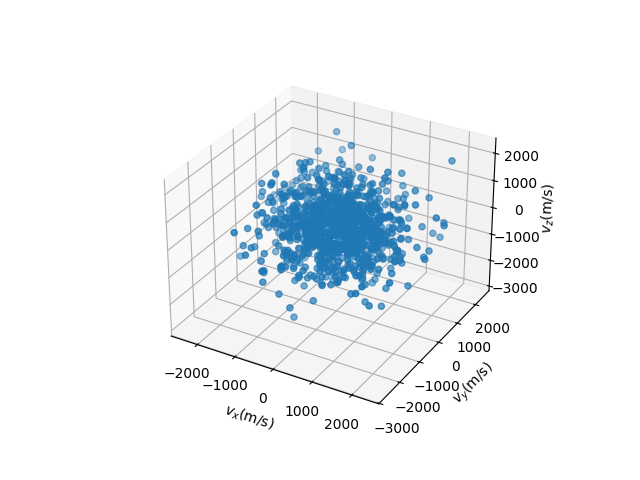

In [13]:
%matplotlib widget


cdf_inv = lambda x : inv_cum_prob_dist(x,m,kb,t)

vx = cdf_inv(np.random.rand(num_points))
vy = cdf_inv(np.random.rand(num_points))
vz = cdf_inv(np.random.rand(num_points))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(f"$v_x$(m/s)")
ax.set_ylabel(f"$v_y$(m/s)")
ax.set_zlabel(f"$v_z$(m/s)")
ax.scatter(vx,vy,vz)
plt.show()
%matplotlib inline

Again looking at the 2D projection.

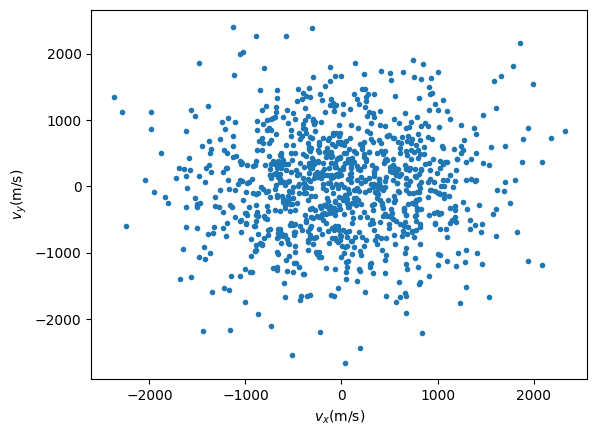

In [14]:
plt.close('all')
plt.plot(vx,vy,".")
plt.xlabel(f"$v_x$(m/s)")
plt.ylabel(f"$v_y$(m/s)")
plt.show()

Comparing this sampling method to the true distribution gives:

In [15]:
out4 = widgets.Output()
b_widget = widgets.BoundedIntText(value=50,min=5,max=100,description="Number of Bins")
sample_button = widgets.Button(description = "Re-Bin")

speed_func = lambda v : maxwell_boltzmann_speed(v,m,kb,t)

def sample_distribution(*args):
	with out4:
		out4.clear_output(wait=True)
		plt.close('all')
		speeds = np.sqrt(vx**2 + vy**2 + vz**2)
		x_vals = np.linspace(0,4000,100)
		y_vals = speed_func(x_vals)
		plt.hist(speeds,bins = b_widget.value,density=True,label="Sampled Distribution")
		plt.plot(x_vals,y_vals,label="Exact Distribution")
		plt.ylabel("Probability Density")
		plt.xlabel("Speed (m/s)")
		plt.legend()
		plt.show()


sample_button.on_click(sample_distribution)

sample_distribution()

controls2 = widgets.VBox([b_widget,sample_button])
view2 = widgets.HBox([controls2,out4])


display(view2)

## Using the speed cdf

We can also sample the speed distribution and then choose a direction uniformly and at random to determine the velocity components. The issue with this approach is that the cumulative distribution function for the speed distribution is not easily invertible and will either require a table or root finding algorithms to accurately go from our uniform random variable to a random variable sampled from the speed distribution. We start with the cumulative distribution function for the speed distribution:

$ \mathrm{Erf}\left(\sqrt{\frac{m}{2 k_b T}} v\right)-\sqrt{\frac{2m}{\pi k_b T}}ve^{-\frac{m v^2}{2 k_b T}} $

What we can do now is generate a table and then use interpolation to do the inverse sampling.

In [16]:
def speed_cdf(v,m,kb,t):
	return erf(np.sqrt(m/(2*kb*t))*v)-np.sqrt((2*m)/(np.pi*kb*t))*v*np.exp(-(m*v**2)/(2*kb*t))

The following code generates the values that will be used in our interpolation. Make sure that vmax is at a location where the probability of a particle having that velocity is sufficiently close to 0.

In [17]:
vmin = 0
vmax = 4000
v_samples = 10000

vs_to_sample = np.linspace(vmin,vmax,v_samples)
c_prob = speed_cdf(vs_to_sample,m,kb,t)

We can now generate speeds in accordance with this distribution and plot against our speed distribution.

In [18]:
vs = np.interp(np.random.rand(num_points), c_prob,vs_to_sample)

out4 = widgets.Output()
b_widget = widgets.BoundedIntText(value=50,min=5,max=100,description="Number of Bins")
sample_button = widgets.Button(description = "Re-Bin")

speed_func = lambda v : maxwell_boltzmann_speed(v,m,kb,t)

def sample_distribution(*args):
	with out4:
		out4.clear_output(wait=True)
		plt.close('all')
		speeds = vs
		x_vals = np.linspace(0,4000,100)
		y_vals = speed_func(x_vals)
		plt.hist(speeds,bins = b_widget.value,density=True,label="Sampled Distribution")
		plt.plot(x_vals,y_vals,label="Exact Distribution")
		plt.ylabel("Probability Density")
		plt.xlabel("Speed (m/s)")
		plt.legend()
		plt.show()


sample_button.on_click(sample_distribution)

sample_distribution()

controls2 = widgets.VBox([b_widget,sample_button])
view2 = widgets.HBox([controls2,out4])


display(view2)

Now that we know that we are following the proper speed distribution, we now need to properly sample our directions to break these down into their components. To do this we do uniform sampling of the unit sphere. (See the stats notebook for more details.)

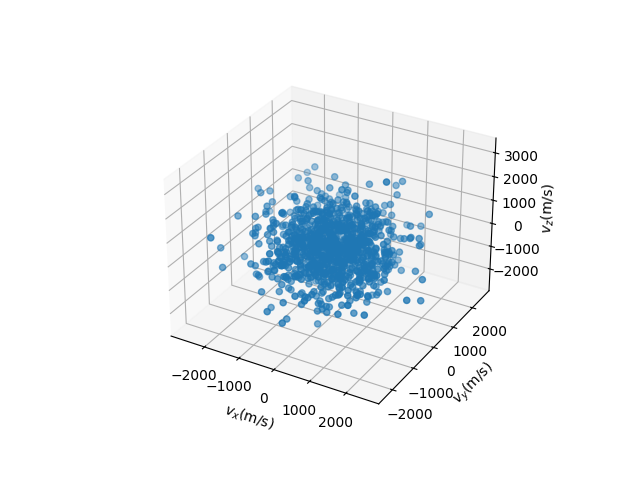

In [15]:
xs, ys, zs = sphere_sample(num_points)
xs = vs*xs
ys = vs*ys
zs = vs*zs

%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(f"$v_x$(m/s)")
ax.set_ylabel(f"$v_y$(m/s)")
ax.set_zlabel(f"$v_z$(m/s)")
ax.scatter(vx,vy,vz)
plt.show()
%matplotlib inline

Projecting this into the 2d plane gives:

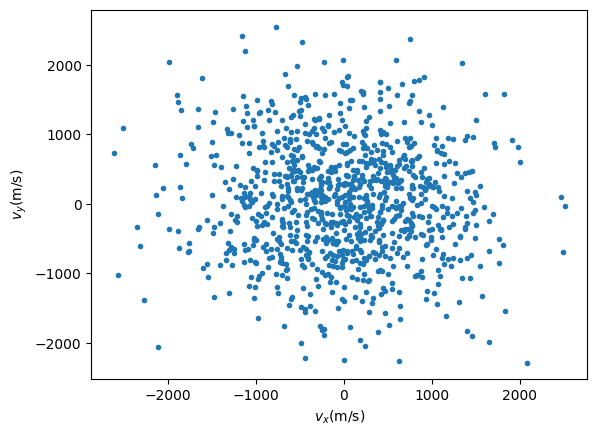

In [16]:
plt.close('all')
plt.plot(vx,vy,".")
plt.xlabel(f"$v_x$(m/s)")
plt.ylabel(f"$v_y$(m/s)")
plt.show()